In [9]:
import os
from subprocess import check_output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import pylab
import scipy.stats as stats

import pickle 
#import mglearn
import time

from sklearn import metrics
from sklearn.metrics import classification_report, mean_absolute_error, accuracy_score, mean_squared_error,mean_squared_log_error, confusion_matrix, roc_auc_score, r2_score

from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, KFold

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
import xgboost 

import scipy
import tqdm
import folium
#:3
from yandex_geocoder import Client
from pygeocoder import Geocoder
from geopy.geocoders import GoogleV3
from geopy import distance
import googlemaps 

import wordcloud
import eli5
import json

In [10]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [61]:
with open('data.json') as json_data:
    d = json.load(json_data)
    json_data.close()

In [17]:
path = d['df_for_analysis']
df = pd.read_csv(path, index_col=0)

In [18]:
df.shape

(671, 33)

In [19]:
df.tail()

,count_room,general_qm,living_qm,kitchen_qm,commit,year_build,floor,count_floors,address,metro,...,conditioning,television,internet,phone,bath,parking,wc,price,with_child,with_animal
666,3.0,110,NaN,NaN,БОНУС АГЕНТУ! Лот:147823 - Садыкова А...,NaN,4.0,12.0,"Москва,ЦАО,р-нТаганский,Марксистскаяул.,7",Таганская,...,False,False,False,False,True,True,False,140000.0,True,True
667,2.0,53,36,10,БЕЗ КОМИССИИ для арендатора. ...,1999.0,4.0,6.0,"Москва,ЦАО,р-нТаганский,2-йСыромятническийпер.,10",Курская,...,False,False,False,False,True,True,False,100000.0,True,False
668,1.0,36,20,9,Шикарное предложение.НОВЫЙ ДОМ.Дом ра...,2015.0,9.0,17.0,"Москва,ЮВАО,р-нРязанский,ул.АкадемикаСкрябина,8",Рязанскийпроспект,...,False,False,False,False,True,True,False,35000.0,True,True
669,2.0,52,32,8,"Сдается 2-х.комнатная квартира м""Отра...",1975.0,8.0,9.0,"Москва,СВАО,р-нОтрадное,ул.Бестужевых,27",Отрадное,...,False,False,False,False,True,True,False,35000.0,True,True
670,4.0,120,NaN,NaN,Светлая 4-х комнатная квартира общей ...,1997.0,8.0,17.0,"Москва,ЗАО,р-нТропарево-Никулино,Никулинскаяул...",Озерная,...,False,False,False,False,True,True,False,88000.0,True,False


Change features

In [20]:
df = df.drop_duplicates(subset=df.columns)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 670
Data columns (total 33 columns):
count_room                516 non-null float64
general_qm                521 non-null object
living_qm                 434 non-null object
kitchen_qm                432 non-null object
commit                    533 non-null object
year_build                289 non-null float64
floor                     521 non-null float64
count_floors              521 non-null float64
address                   533 non-null object
metro                     521 non-null object
is_walking_metro          504 non-null object
minutes_to_underground    504 non-null float64
is_deposit                0 non-null float64
is_commission             0 non-null float64
commission                0 non-null float64
is_prepay                 0 non-null float64
lift                      521 non-null object
balcony                   521 non-null object
fridge                    521 non-null object
dishwasher          

In [22]:
str_list = ['commit','address','metro']

In [23]:
bina_list = ['is_deposit'       ,
                'is_commission'    ,
                'is_prepay'        ,
                'lift'             ,
                'balcony'          ,
                'fridge'           ,
                'dishwasher'       ,
                'washer'           ,
                'furniture_room'   ,
                'furniture_kitchen',
                'conditioning'     ,
                'television'       ,
                'internet'         ,
                'phone'            ,
                'bath'             ,
                'parking'          ,
                'wc'             ,  
                'is_walking_metro',
                'with_child',
                'with_animal']

In [24]:
float_list = ['count_room',
              'general_qm',             
              'living_qm',               
              'kitchen_qm',
              'year_build',
               'floor',
             'count_floors',
             'commission',
             'minutes_to_underground',
              'minutes_to_underground',
             'price']

In [25]:
df.isna().any()

count_room                True
general_qm                True
living_qm                 True
kitchen_qm                True
commit                    True
year_build                True
floor                     True
count_floors              True
address                   True
metro                     True
is_walking_metro          True
minutes_to_underground    True
is_deposit                True
is_commission             True
commission                True
is_prepay                 True
lift                      True
balcony                   True
fridge                    True
dishwasher                True
washer                    True
furniture_room            True
furniture_kitchen         True
conditioning              True
television                True
internet                  True
phone                     True
bath                      True
parking                   True
wc                        True
price                     True
with_child                True
with_ani

In [26]:
df['general_qm'] = df['general_qm'].str.replace(',','.')
df['living_qm'] = df['living_qm'].str.replace(',','.')
df['kitchen_qm'] = df['kitchen_qm'].str.replace(',','.')

In [27]:
df = df.fillna(-1)
df[float_list] = df[float_list].astype('float')
df[bina_list] = df[bina_list].astype('int')
df[str_list] = df[str_list].astype('object')

In [28]:
df[str_list] = df[str_list].replace(-1,'unknown')

In [29]:
df[str_list] = df[str_list].replace('-1','unknown')

## General

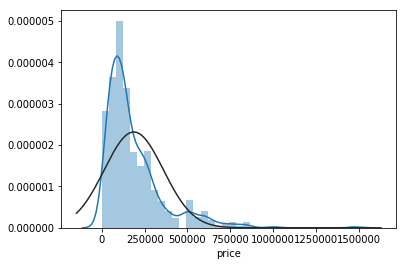

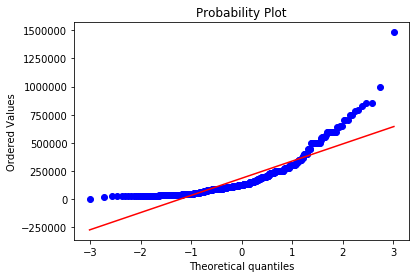

In [30]:
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['price'],fit=norm);
fig = plt.figure()
res = scipy.stats.probplot(df['price'], plot=plt)

So, certainly not normal: we have right-skewness and the data is a bit peak-y. Let's apply a log transform on the data and see what happens...

In [31]:
df['price'] = df['price'].replace(-1,df.price.median())

In [32]:
df.price = df.price.fillna(df.price.median())

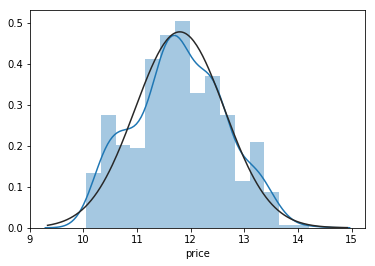

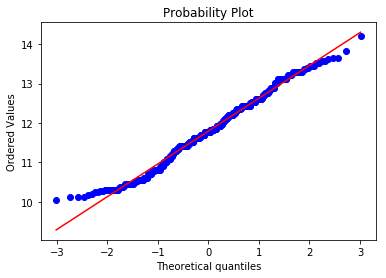

In [33]:
sns.distplot(np.log(df['price']),fit=norm);
fig = plt.figure()
res = scipy.stats.probplot(np.log(df['price']), plot=plt)

## A Better Fit!
That looks much more normal, which will hopefully improve the regressions. We just have to remember to transform the output data back using an exponentiation before we submit anything.

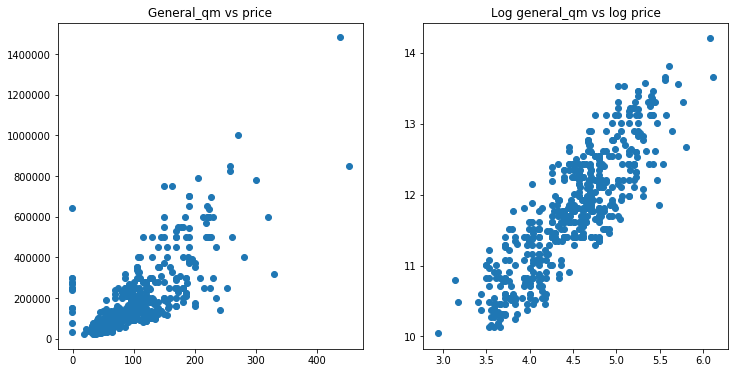

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['general_qm'], df['price'])
plt.title('General_qm vs price');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df['general_qm']), np.log1p(df['price']))
plt.title('Log general_qm vs log price');

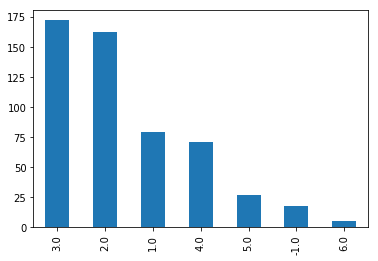

In [36]:
df['count_room'].value_counts().plot(kind='bar')

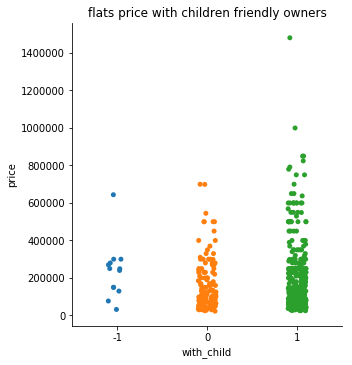

In [37]:
sns.catplot(x='with_child', y='price', data=df);
plt.title('flats price with children friendly owners');

## Commit

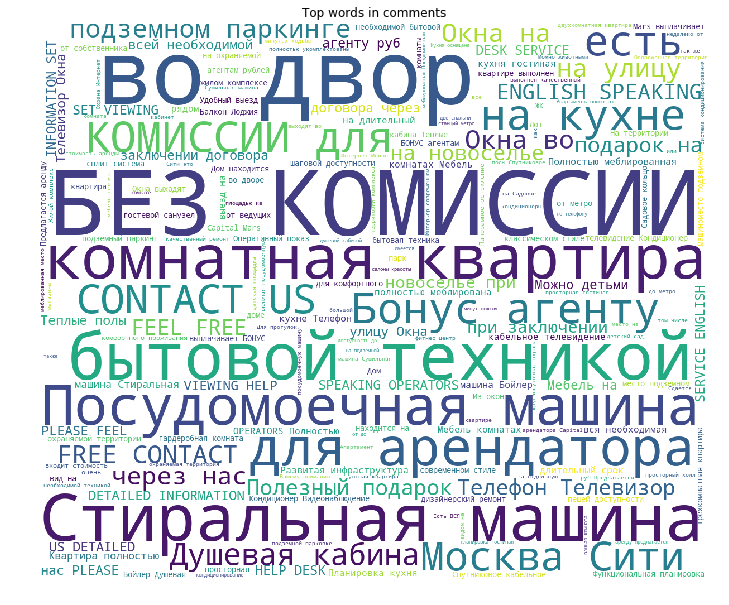

In [38]:
plt.figure(figsize = (12, 12))
text = ' '.join(df['commit'].values)
wordcloud = wordcloud.WordCloud(max_font_size=None, background_color='white', 
                                width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in comments')
plt.axis("off")
plt.show()

In [39]:
corpus = df.commit.value_counts().index.tolist()

In [40]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=5, max_features=300)

# Transforms the data into a bag of words
count_train = count_vec.fit(corpus)
bag_of_words = count_vec.transform(corpus)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['000', '000 руб', '000 рублей', '10', '24', '24 help', '24 help desk', 'contact', 'contact detailed', 'contact detailed information', 'desk', 'desk service', 'desk service english', 'detailed', 'detailed information', 'detailed information set', 'english', 'english speaking', 'english speaking operators', 'feel', 'feel free', 'feel free contact', 'free', 'free contact', 'free contact detailed', 'help', 'help desk', 'help desk service', 'id', 'information', 'information set', 'information set viewing', 'operators', 'operators полностью', 'operators полностью меблированная', 'service', 'service english', 'service english speaking', 'set', 'set viewing', 'set viewing 24', 'speaking', 'speaking operators', 'speaking operators полностью', 'viewing', 'viewing 24', 'viewing 24 help', 'агентам', 'агенту', 'апартаменты', 'арендатора', 'аренду', 'балкон', 'без', 'без комиссии', 'без комиссии для', 'бойлер', 'большая', 'бонус', 'бонус агентам', 'бонус агенту', 'бытовая', 'бытовая 

In [41]:
# holdout_size
holdout = df[400:]
train = df[:400] 

In [42]:
test_size = 0.25

X_train_commit, X_test_commit, y_train_commit, y_test_commit = train_test_split(train.commit,train.price,test_size=test_size,random_state=17)

In [43]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 3),
    min_df=7,max_df=0.8)

# fit and transform on it the training features
word_vectorizer.fit(X_train_commit)
X_train_word_features = word_vectorizer.transform(X_train_commit)

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(X_test_commit)

# transform the holdout text for submission at the end
holdout_text = holdout['commit']
holdout_word_features = word_vectorizer.transform(holdout_text)

Features with lowest weight:
['можно' 'площадка' 'площади' 'плату' 'платежи']

Features with highest weight:
['пространство' 'город столиц' 'из окон открывается' 'панорамное'
 'постирочная']


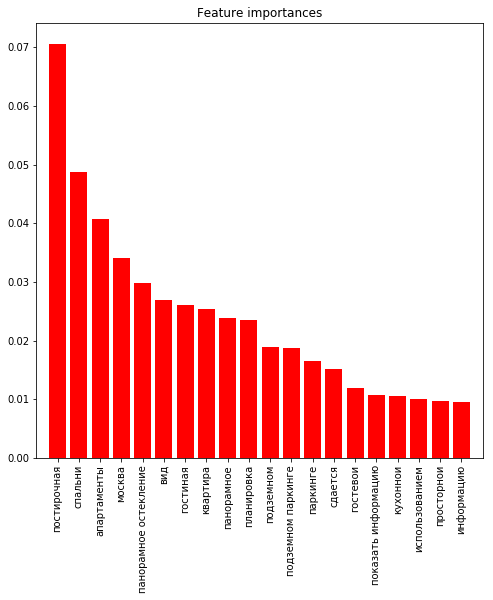

In [44]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train_word_features,y_train_commit)

feature_names = np.array(word_vectorizer.get_feature_names())

sorted_by_rf_weight = np.argsort(regressor.feature_importances_)

print("Features with lowest weight:\n{}".format(
       feature_names[sorted_by_rf_weight[:5]]))
print("\nFeatures with highest weight:\n{}".format(
       feature_names[sorted_by_rf_weight[-5:]]))

model_RFR = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model_RFR.fit(X_train_word_features, y_train_commit)
# model_RFR.fit(map(lambda x: [x],X),y)
feat_names = feature_names

## plot the importances ##
importances = model_RFR.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model_RFR.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [45]:
eli5.show_weights(regressor, vec=word_vectorizer, top=10,
                  feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.0983,постирочная
0.0752,панорамное
0.0479,из окон открывается
0.0355,город столиц
0.0273,пространство
0.0272,вид
0.0270,зонои
0.0232,подземном
0.0228,спальни
0.0204,апартаменты


Make prediction only on text

In [46]:
y_pred_commit = regressor.predict(test_features)

In [47]:
mean_absolute_error(y_test_commit,y_pred_commit)

75550.6113671875

Text(0.5, 0, 'pred')

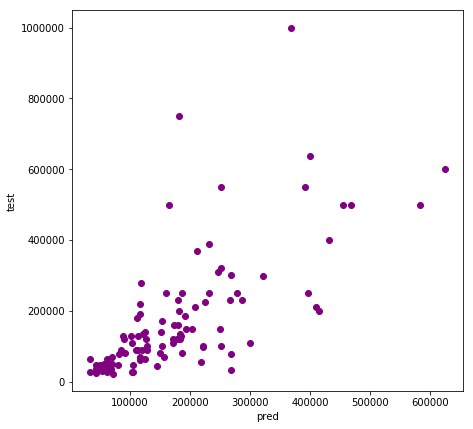

In [48]:
fig = plt.figure(figsize=(7,7))
plt.scatter(y_pred_commit,y_test_commit, c='purple')
plt.ylabel('test')
plt.xlabel('pred')

## Fetures from addr

Thus, as of 2015, the administrative division of Moscow into districts and districts is as follows: the territory of the city is divided into 12 areas, they include 130 districts, as well as 16 rural settlements, 2 urban settlements and 2 urban areas.

In [49]:
df.address.head()

0            Москва,ЦАО,р-нАрбат,Новинскийбул.,28/35С1
1            Москва,ЮВАО,р-нЛюблино,Мариупольскаяул.,8
2      Москва,ЗАО,р-нДорогомилово,Кутузовскийпросп.,19
3     Москва,ЗАО,р-нДорогомилово,Кутузовскийпросп.,4/2
4    Москва,ЦАО,р-нПресненский,СреднийКисловскийпер...
Name: address, dtype: object

In [50]:
district = []
area_list = []
for add in df.address:
    if add != 'unknown':
        add = add.split(',')
        area = add[1]
        dis = add[2]
        area_list.append(area)
        if 'р-н' in dis:
            dis = dis.replace('р-н','')
            district.append(dis)
        else: 
            district.append(dis)
    else: 
        district.append('unknown')
        area_list.append(area)

In [51]:
df['district'] = district

In [52]:
df['area'] = area_list

## Models

In [53]:
test_size = 0.25
X = train.drop(columns=['address','commit','price','metro'])
y = train.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=17)

In [54]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GB' ,GradientBoostingRegressor()))
models.append(('LGBM',LGBMRegressor()))
models.append(('XGB', xgboost.XGBRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=17)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: mae:%f (std: %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: mae:-58882.818563 (std: 8696.910608)
LASSO: mae:-58871.760368 (std: 8699.486253)
EN: mae:-56222.585088 (std: 9704.902825)
KNN: mae:-55953.752000 (std: 10090.815757)
CART: mae:-61423.363333 (std: 16588.508328)
SVR: mae:-109666.901546 (std: 20010.847966)
RandomForest: mae:-56169.439889 (std: 11409.936084)
GB: mae:-51746.147000 (std: 9520.995117)
LGBM: mae:-56507.689090 (std: 11628.217311)
XGB: mae:-52687.063665 (std: 10787.221996)


## Location

In [55]:
df['address'] = df['address'].replace('-1','unknown')

In [56]:
Client.coordinates(df['address'].iloc[0])[0]

'37.585556'

In [58]:
# extracting by yandex_API
# Have already downloaded in df 

location_latitude_ya = []
location_longitude_ya = []
for addr in df['address']:
    time.sleep(1)

    if addr != 'unknown':
        coord = Client.coordinates(addr)
        location_longitude_ya.append(coord[0])
        location_latitude_ya.append(coord[1])
    else: 
        location_latitude_ya.append(-1)
        location_longitude_ya.append(-1)

if are founded not all coordinates

In [49]:
df['location_latitude_ya'] = df_coord["latitude"]
df['location_longitude_ya'] = df_coord['longitude']

nan_ind = df[(df.location_longitude_ya.isna() == True)].index

# extracting by yandex_API
# Have already downloaded in df 

location_latitude_ya_new = []
location_longitude_ya_new = []
for addr in df['address'].loc[nan_ind]:
    time.sleep(1)
#     try:
    if addr != 'unknown':
        coord = Client.coordinates(addr)
        location_longitude_ya_new.append(coord[0])
        location_latitude_ya_new.append(coord[1])
    else: 
        location_latitude_ya_new.append(-1)
        location_longitude_ya_new.append(-1)

df_coord_new = pd.DataFrame({'latitude':location_latitude_ya_new,'longitude':location_longitude_ya_new},index=nan_ind)

df_coord = pd.concat([df_coord,df_coord_new])

In [50]:
# df_coord.to_csv(d['path_coord'])

In [62]:
# df_coord = pd.read_csv(d['path_coord'],index_col=0)

In [63]:
df['latitude'] = df_coord['latitude']
df['longitude'] = df_coord['longitude']

In [64]:
msk_coordinates = [55.7522200, 37.6155600]

In [65]:
list_dist_centre = []
for index, row in df[['latitude','longitude']].iterrows(): 
    try:
        if (row['latitude']==-1)&(row['longitude']==-1) :
               list_dist_centre.append(int(-1)) 
        else:
            location=(row['latitude'], row['longitude'])
            msc = (msk_coordinates[0], msk_coordinates[1])
            list_dist_centre.append(distance.vincenty(location, msc).km) 
    except: 
        list_dist_centre.append(-1) 

In [66]:
df['dist_centre'] = list_dist_centre

In [67]:
m_ya = folium.Map(location=msc)

for index, row in df[(df['latitude']!=-1)&(df['longitude'] !=-1)].iterrows():
    
    if row['price']<50000:
        icon = folium.Icon(color='green', icon='info-sign')
    elif row['price']>110000:
        icon = folium.Icon(color='red', icon='info-sign')
    else: icon = folium.Icon(color='orange', icon='info-sign')
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip = row['price'],
        icon = icon
        
    ).add_to(m_ya)
    
    
folium.Marker(
        location=msk_coordinates,
        tooltip = 'MOSCOW CENTRE',
        icon = folium.Icon(color='black')
    ).add_to(m_ya)

folium.Circle(
        location=msk_coordinates,
        radius=2300,
        toottip = 'Sadovoy circle'
    ).add_to(m_ya)
m_ya

In [68]:
msc_city_coord = [55.7498627, 37.5386314]

In [69]:
list_dist_msc_city = []
for index, row in df[['latitude','longitude']].iterrows(): 
    try:
        if (row['latitude']==-1)&(row['longitude']==-1) :
               list_dist_msc_city.append(int(-1)) 
        else:
            location=(row['latitude'], row['longitude'])
            msc = (msc_city_coord[0], msc_city_coord[1])
            list_dist_msc_city.append(distance.vincenty(location, msc).km) 
    except: 
        list_dist_msc_city.append(-1) 

In [71]:
df['dist_msc_city'] = list_dist_msc_city

## Modelling and feature generation

In [72]:
df_feat = df.drop(columns=['district','metro','address','commit','area',
                           'latitude','longitude','price'])

In [73]:
def my_cross_val_score(data,target):
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    mae_cv_result = []
    
    for train_ind, val_ind in cv.split(data, target):
        X_train_ = data.iloc[train_ind]
        y_train_ = np.log(target.iloc[train_ind])
        X_val_ = data.iloc[val_ind]
        y_val_ = np.log(target.iloc[val_ind])

        model = xgboost.XGBRegressor()
        model.fit(X_train_,y_train_)
        y_pred_ = model.predict(X_val_)
        exp_y_pred = np.exp(y_pred_)
        exp_y_val = np.exp(y_val_)
        mae = mean_absolute_error(exp_y_val,exp_y_pred)
        mae_cv_result.append((mae))
    return np.mean(mae_cv_result)

In [74]:
my_cross_val_score(df_feat, df.price)

50447.673345509225

Features impotances

In [75]:
model = xgboost.XGBRegressor()
model.fit(df_feat, df.price)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [76]:
feat_imp = model.feature_importances_

In [77]:
ind = np.argsort(model.feature_importances_)

In [78]:
df_feat_col = df_feat.columns

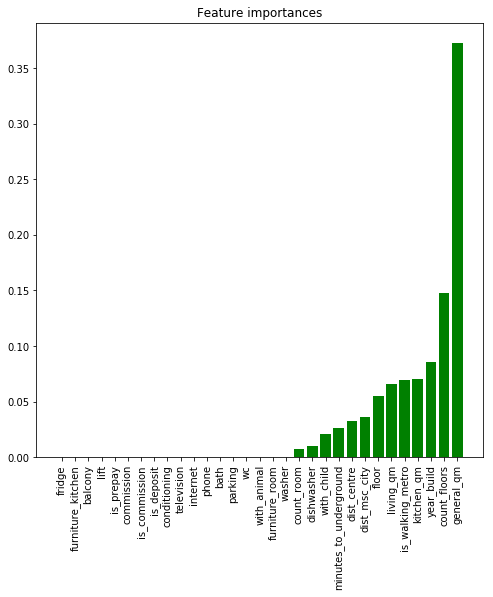

In [79]:
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(len(ind)), feat_imp[ind], color="g", align="center")
plt.xticks(range(len(ind)), df_feat_col[ind], rotation='vertical')

plt.show()

## Look at the range of numerical values

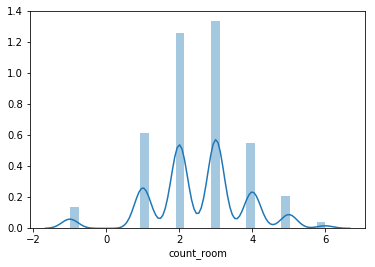

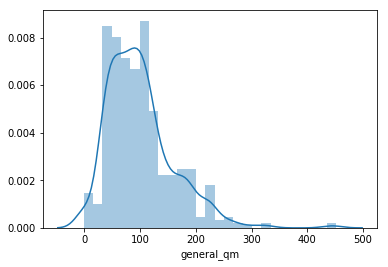

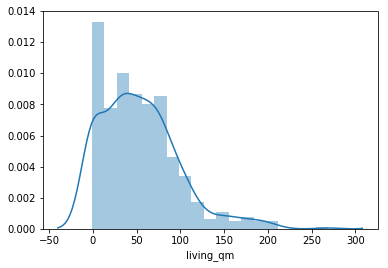

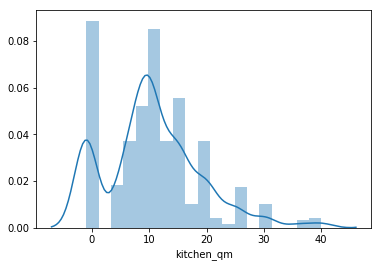

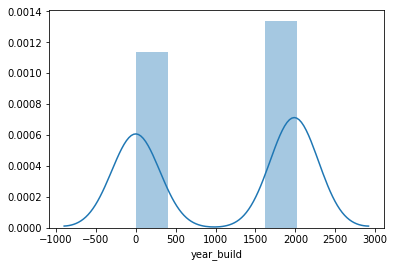

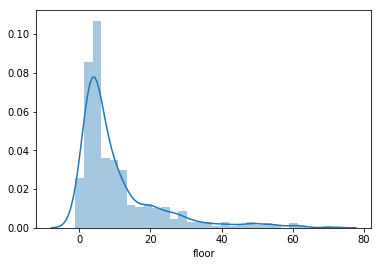

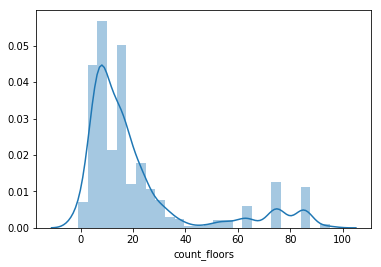

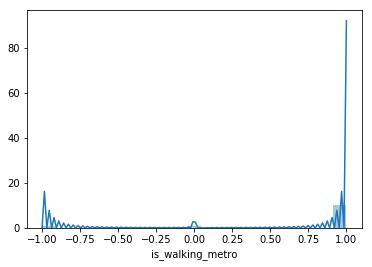

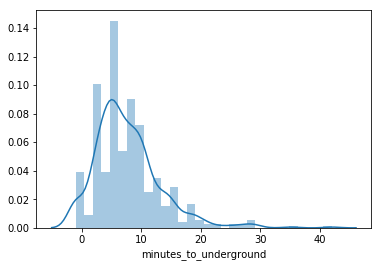

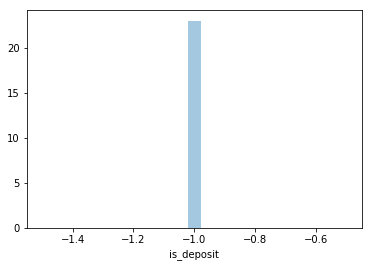

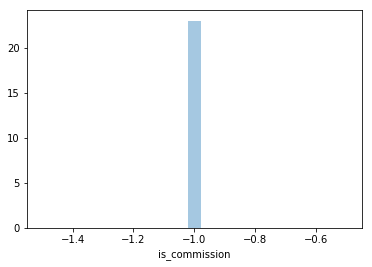

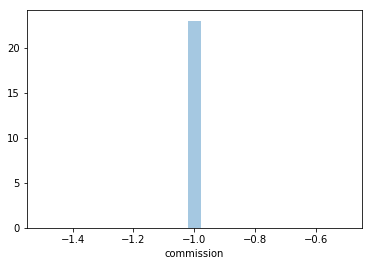

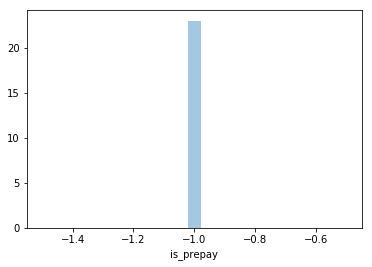

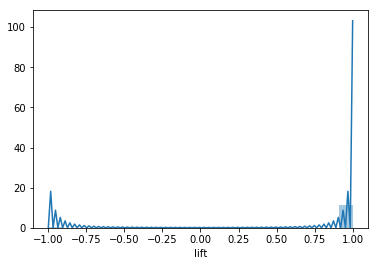

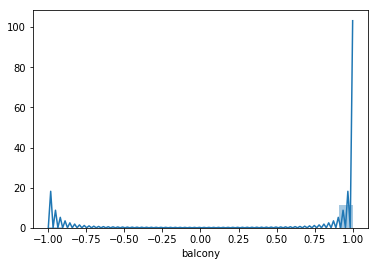

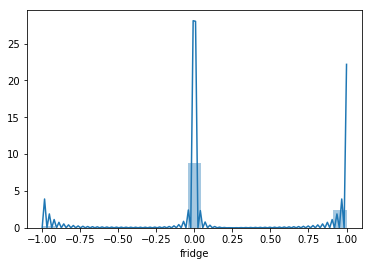

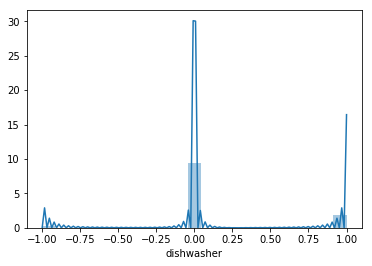

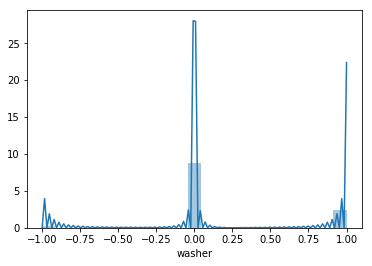

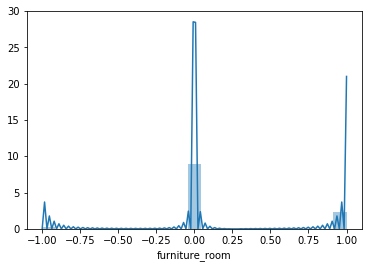

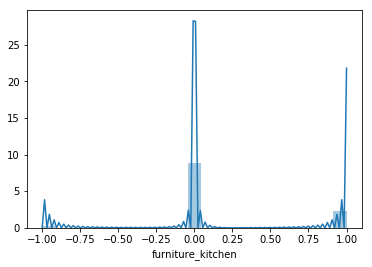

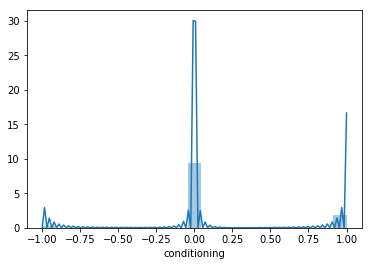

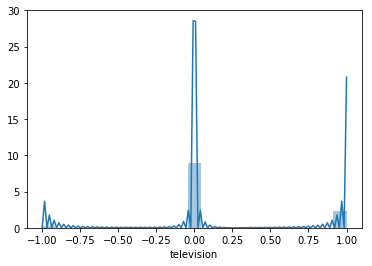

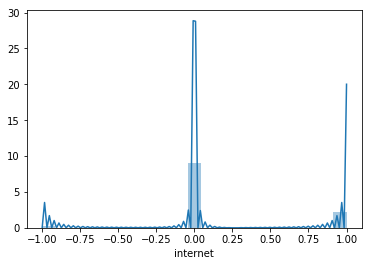

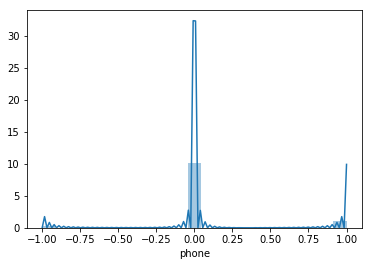

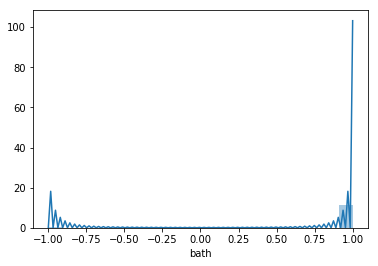

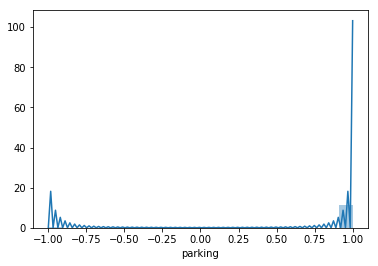

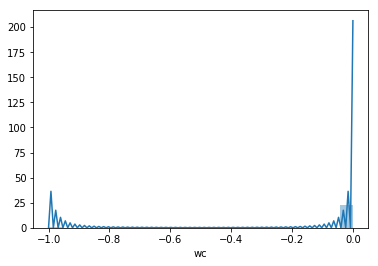

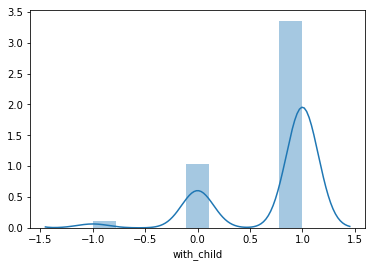

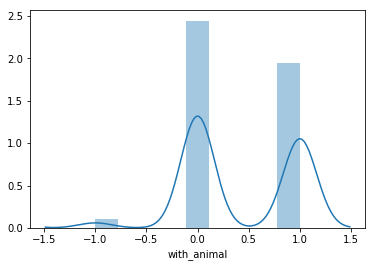

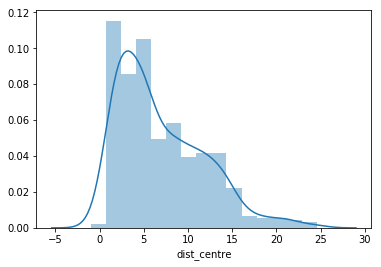

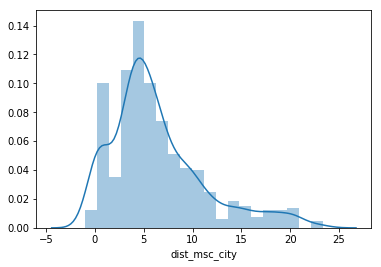

In [80]:
for col in df_feat.columns:
    sns.distplot(df_feat[col], label='label here')
    plt.show()

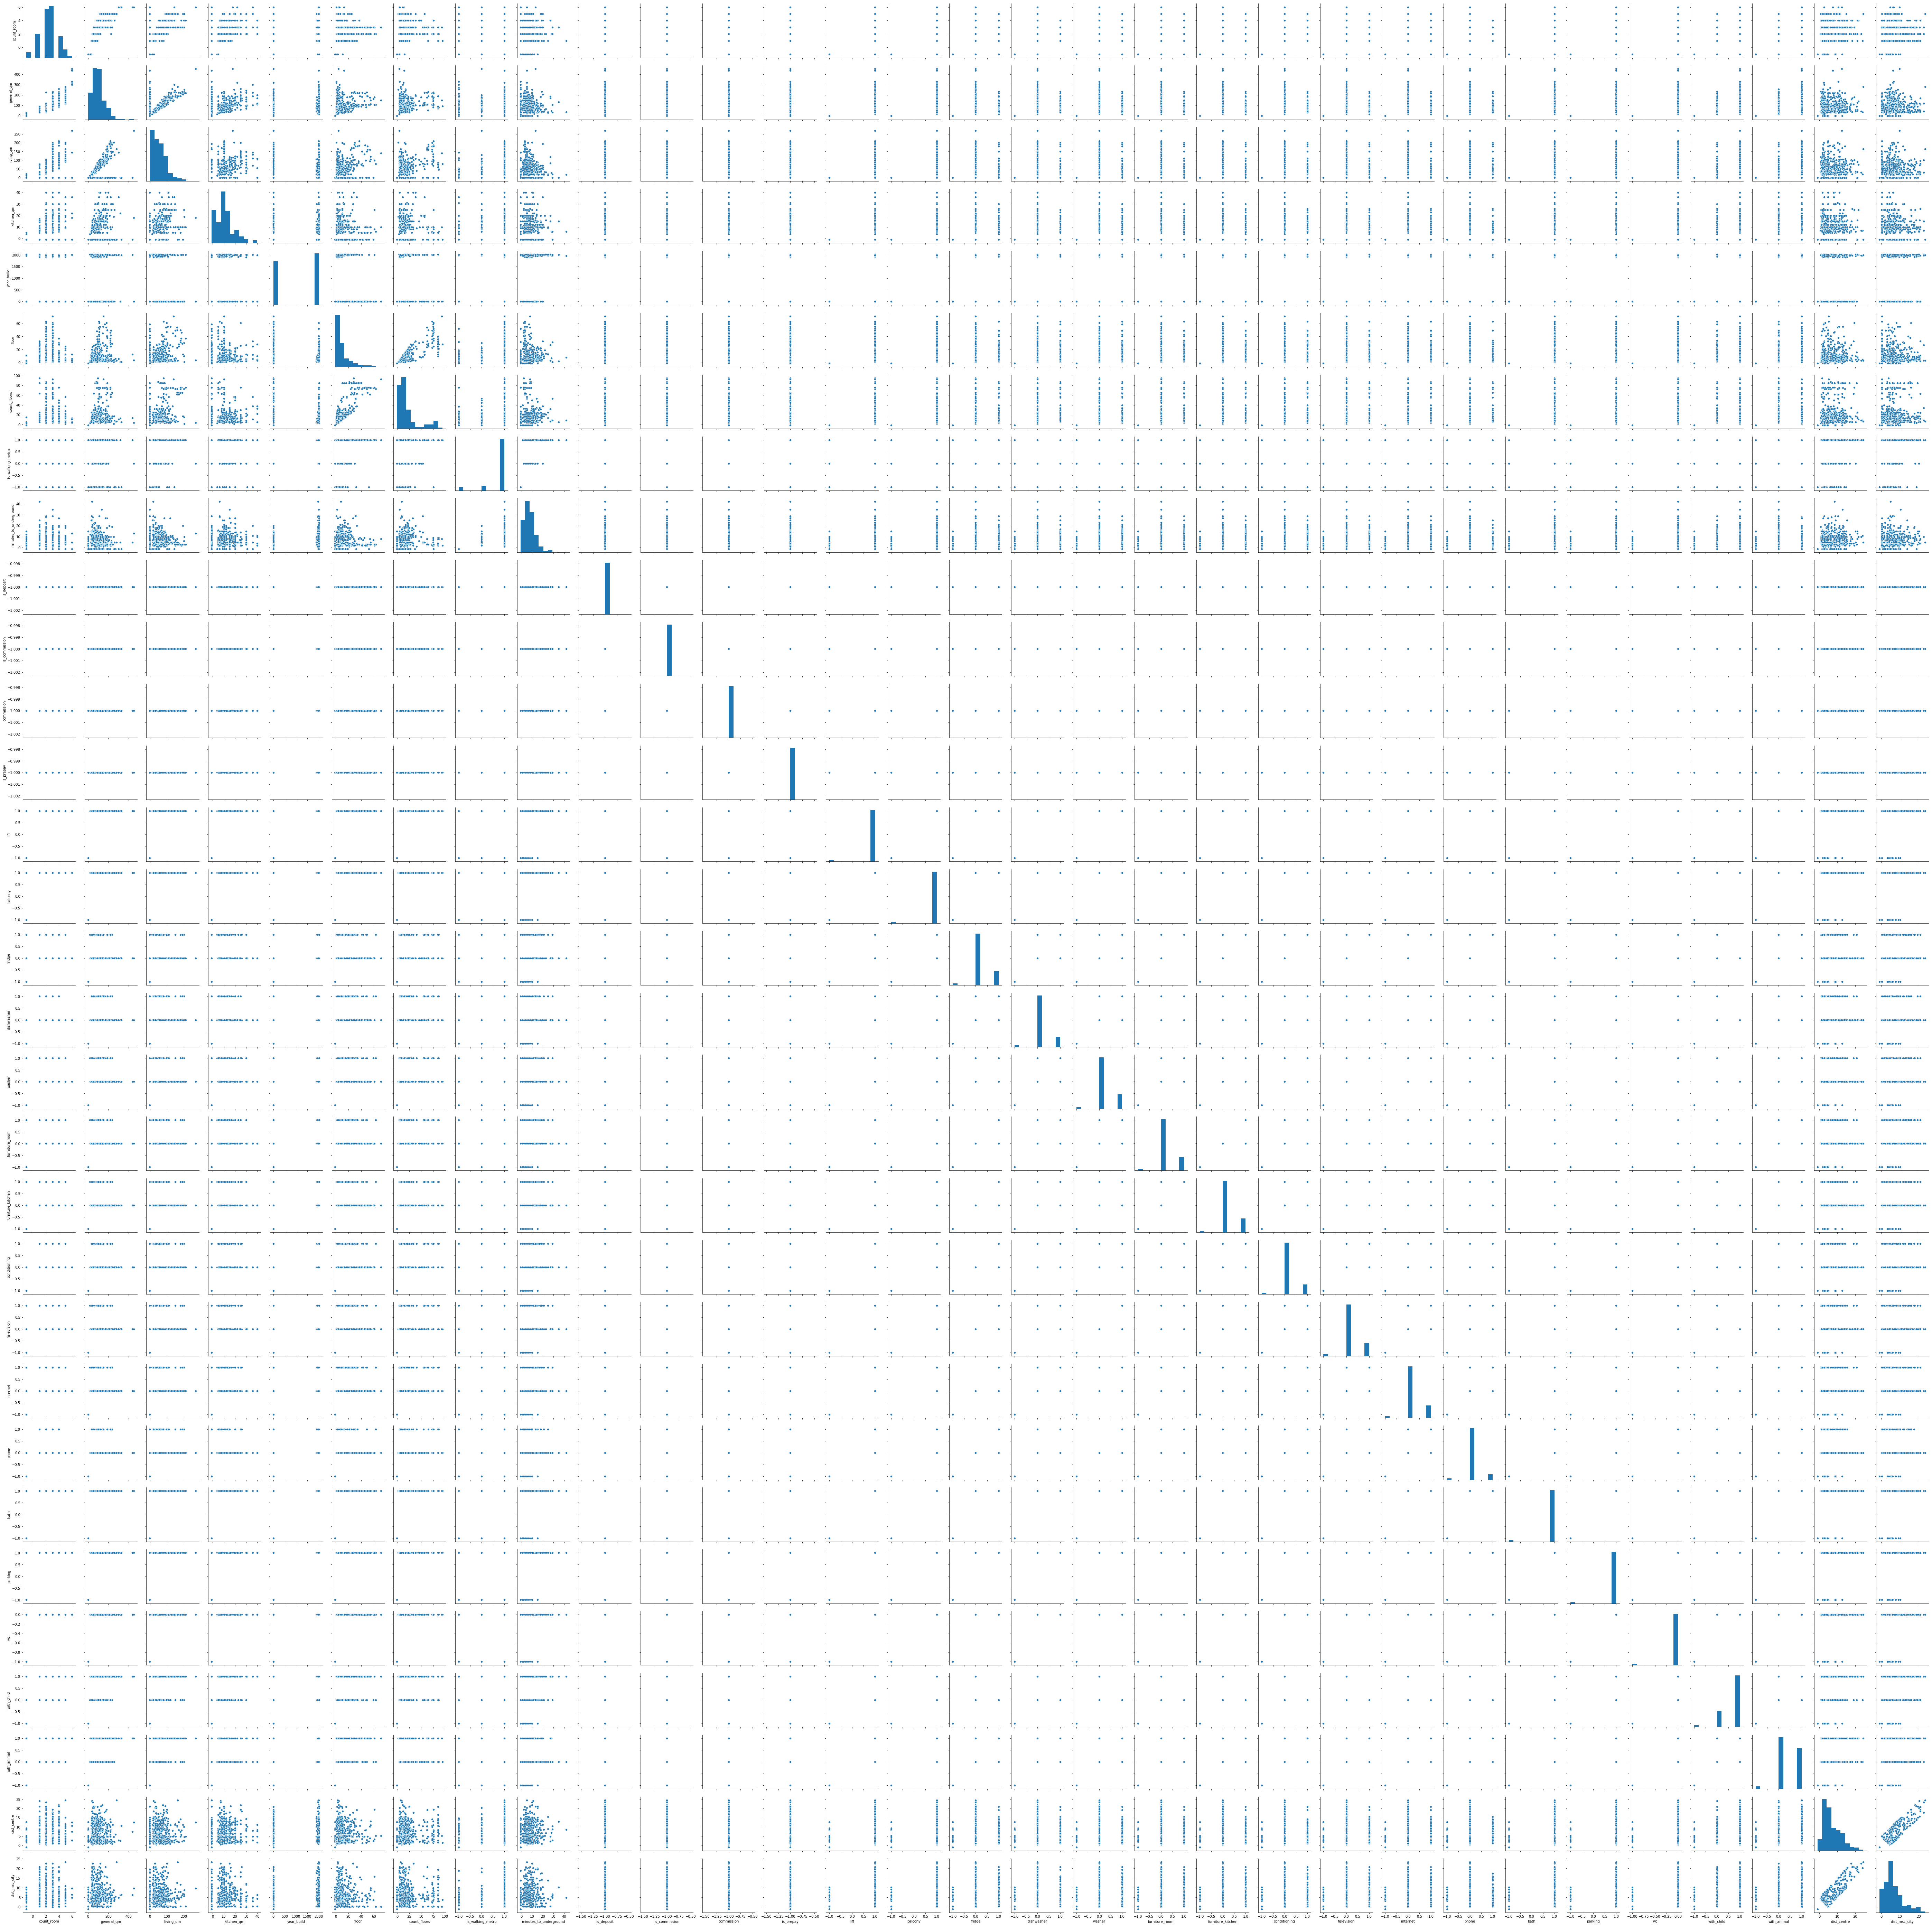

In [81]:
sns_plot = sns.pairplot(df_feat)

## Corr

In [82]:
df_feat['price'] = df['price']

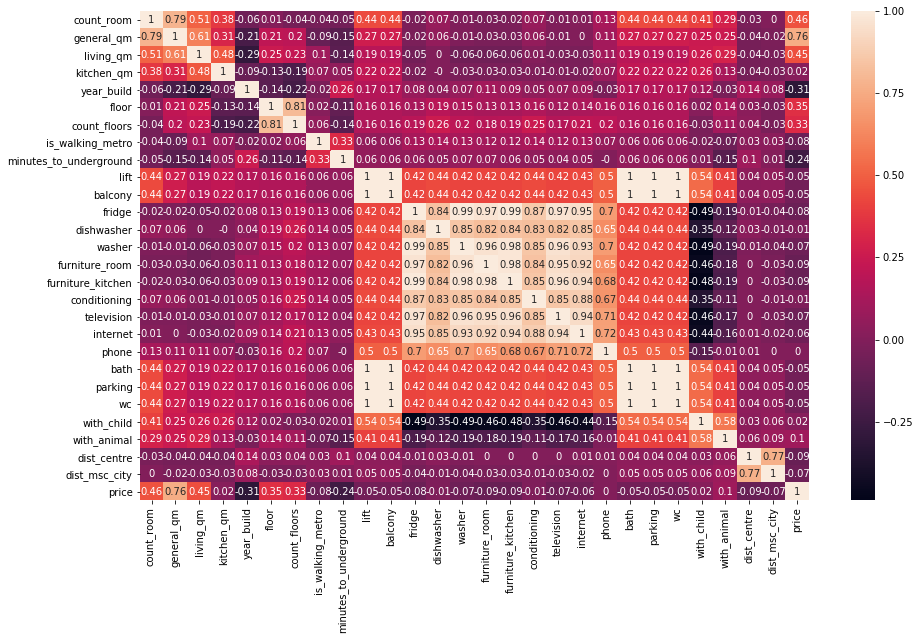

In [83]:
correlation_matrix = df_feat.drop(columns=['is_deposit','is_commission','commission','is_prepay']).corr().round(2)
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

columns=['is_deposit','is_commission','commission','is_prepay','phone'] are not useful 

In [84]:
df_feat.lift.value_counts()

 1    521
-1     13
Name: lift, dtype: int64

In [85]:
df_feat.is_commission.value_counts()

-1    534
Name: is_commission, dtype: int64

In [86]:
df_feat.parking.value_counts()

 1    521
-1     13
Name: parking, dtype: int64

In [87]:
df_feat.washer.value_counts()

 0    408
 1    113
-1     13
Name: washer, dtype: int64

In [88]:
df_feat = df_feat.drop(columns=['price','is_deposit','is_commission','commission','is_prepay','phone'])

## Normalization

In [89]:
df_feat.columns

Index(['count_room', 'general_qm', 'living_qm', 'kitchen_qm', 'year_build',
       'floor', 'count_floors', 'is_walking_metro', 'minutes_to_underground',
       'lift', 'balcony', 'fridge', 'dishwasher', 'washer', 'furniture_room',
       'furniture_kitchen', 'conditioning', 'television', 'internet', 'phone',
       'bath', 'parking', 'wc', 'with_child', 'with_animal', 'dist_centre',
       'dist_msc_city'],
      dtype='object')

In [90]:
def stand_scail(ser):
    sc = StandardScaler()
    new_ser = sc.fit_transform(ser)
    return new_ser

In [91]:
df_feat_scale = stand_scail(df_feat)

In [92]:
df_feat_scale = pd.DataFrame(df_feat_scale,columns=df_feat.columns)

In [93]:
my_cross_val_score(df_feat_scale, df.price)

50161.55465901764

## Categorical

In [111]:
df.select_dtypes('object').head()

,commit,address,metro,district,area
0,ПРЕДОСТАВЛЯЕМ КЛИЕНТАМ СКИДКУ НА ПЕРВ...,"Москва,ЦАО,р-нАрбат,Новинскийбул.,28/35С1",Баррикадная,Арбат,ЦАО
1,ВСЕХ-ВСЕХ-ВСЕХ!! В ЛЮБОМ КОЛИЧЕСТВЕ И...,"Москва,ЮВАО,р-нЛюблино,Мариупольскаяул.,8",Люблино,Люблино,ЮВАО
2,Вашему вниманию предлагается прекрасн...,"Москва,ЗАО,р-нДорогомилово,Кутузовскийпросп.,19",Кутузовская,Дорогомилово,ЗАО
3,ID 21477 Мария Апарина Бонус агенту ...,"Москва,ЗАО,р-нДорогомилово,Кутузовскийпросп.,4/2",Киевская,Дорогомилово,ЗАО
4,ID 23893 Юлия Дмитриева Бонус агенту...,"Москва,ЦАО,р-нПресненский,СреднийКисловскийпер...",Арбатская,Пресненский,ЦАО


In [95]:
top_areas = df.area.value_counts().index

In [96]:
top_districts = df.district.value_counts().index[:25]

In [97]:
top_metro_st = df.metro.value_counts().index[:40]

In [99]:
list_metro_feat = ['metro_' + g for g in top_metro_st]
list_distr_feat = ['district_' + g for g in top_districts]
list_area_feat = ['area_' + g for g in top_areas]

In [103]:
for g in top_metro_st:
    df_feat['metro_' + g] = df['metro'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with metro features',my_cross_val_score(df_feat,df.price))
df_feat = df_feat.drop(columns=list_metro_feat) 

for g in top_districts:
    df_feat['district_' + g] = df['district'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with top_district features',my_cross_val_score(df_feat,df.price))
df_feat = df_feat.drop(columns=list_distr_feat) 

for g in top_areas:
    df_feat['area_' + g] = df['area'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with top_area features',my_cross_val_score(df_feat,df.price))
df_feat = df_feat.drop(columns=list_area_feat)     

mae_cross_val_score with metro features 44786.421207679414
mae_cross_val_score with top_district features 45356.88546452758
mae_cross_val_score with top_area features 45914.08627446658


In [101]:
#with all
for g in top_metro_st:
    df_feat['metro_' + g] = df['metro'].apply(lambda x: 1 if g in x else 0)

for g in top_districts:
    df_feat['district_' + g] = df['district'].apply(lambda x: 1 if g in x else 0)

for g in top_areas:
    df_feat['area_' + g] = df['area'].apply(lambda x: 1 if g in x else 0)
print(my_cross_val_score(df_feat, df.price))

44786.421207679414


Try with scaling features

In [104]:
for g in top_metro_st:
    df_feat_scale['metro_' + g] = df['metro'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with metro features and used scaling',my_cross_val_score(df_feat_scale,df.price))
df_feat_scale = df_feat_scale.drop(columns=list_metro_feat) 

for g in top_districts:
    df_feat_scale['district_' + g] = df['district'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with district features and used scaling',my_cross_val_score(df_feat_scale,df.price))
df_feat_scale = df_feat_scale.drop(columns=list_distr_feat) 

for g in top_areas:
    df_feat_scale['area_' + g] = df['area'].apply(lambda x: 1 if g in x else 0)
print('mae_cross_val_score with areas feature and used scaling',my_cross_val_score(df_feat_scale,df.price))
df_feat_scale = df_feat_scale.drop(columns=list_area_feat)     

mae_cross_val_score with metro features and used scaling 51461.80743430804
mae_cross_val_score with district features and used scaling 50686.84199043103
mae_cross_val_score with areas feature and used scaling 50047.606114889626


In [105]:
#with all
for g in top_metro_st:
    df_feat_scale['metro_' + g] = df['metro'].apply(lambda x: 1 if g in x else 0)

for g in top_districts:
    df_feat_scale['district_' + g] = df['district'].apply(lambda x: 1 if g in x else 0)

for g in top_areas:
    df_feat_scale['area_' + g] = df['area'].apply(lambda x: 1 if g in x else 0)

print(my_cross_val_score(df_feat_scale, df.price))

51993.56072162647


In [107]:
df_feat = df_feat.drop(columns=list_distr_feat+list_area_feat+list_metro_feat) 
df_feat_scale = df_feat_scale.drop(columns=list_distr_feat+list_area_feat+list_metro_feat)

Scaling features are little worse than no scalling on cross_validation. The area feature gives the biggest increase in quality.

In [108]:
for g in top_areas:
    df_feat['area_' + g] = df['area'].apply(lambda x: 1 if g in x else 0)

## Tfidf

In [109]:
df_feat['commit'] = df.commit
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 3),
    min_df=9,max_df=0.8,max_features=50)
X_train, X_test, y_train, y_test = train_test_split(df_feat, df.price)
# fit and transform on it the training features
# word_vectorizer.fit(X_train['commit'])
X_train_comm = word_vectorizer.fit_transform(X_train['commit'])
X_test_comm = word_vectorizer.transform(X_test.commit)

df_feat = df_feat.drop(columns='commit')
X_train = X_train.drop(columns='commit')
X_test = X_test.drop(columns='commit')

df_commit_train = pd.DataFrame(X_train_comm.toarray(),columns=word_vectorizer.vocabulary_.keys(),
                               index=X_train.index)
df_commit_test = pd.DataFrame(X_test_comm.toarray(),columns=word_vectorizer.vocabulary_.keys(),
                               index=X_test.index)
X_train = pd.concat([X_train,df_commit_train],axis=1)
X_test = pd.concat([X_test,df_commit_test],axis=1)

In [110]:
my_cross_val_score(X_train,y_train)

53275.01418945312

In general, Tfidf doesn't increase quality.